# Data cleaning and transfomration and Exploratory data analysis (EDA) - FIFA 21 Dataset
Link to query the kaggle dataset [Fifa 21 Dataset](https://www.kaggle.com/datasets/yagunnersya/fifa-21-messy-raw-dataset-for-cleaning-exploring?select=fifa21_raw_data.csv%E2%80%8B).

In this project our goal is uncover insight about the dataset. Fisrt we have to clean and transform the data to enhance our perspective and the way that we might use the columns to reach new knowledge.

**Data cleaning and transfomration:** 

Some questions:

* Should we remove columns that don't add value to our analysis?
* Do the height and weight columns have the appropriate data types?
* Can you separate the joined column into year, month and day columns?
* Can you clean and transform the value, wage and release clause columns into columns of integers?
* How can you remove the newline characters from the Club column?
* Can you clean and transform columns with 'star' characters?

**Exploratory data analysis:**

Some questions:

* Which are the better payed positions?
* Which players are highly valuable but still underpaid (on low wages)?
* Which countries should club managers look to for potential talent to develop?

First we need to import the necessary libraries and packages to explore the dataset and visualize the results.

In [1]:
# Packages for numerics + dataframes
import pandas as pd
import numpy as np
import datetime as dt

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

We're gonna read the dataframe and save it at a df variable.

In [2]:
# Load the dataset into a dataframe
df = pd.read_csv("fifa21 raw data v2.csv", low_memory=False)

## Data exploration 
First we need to know the data, 
1. How many columns and rows do we have? 
2. What is the datatype of these columns?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

We have 77 columns and 18.979 rows of data to overall of more that 1.400.000 points of data. Besides we have two datatypes: object and int64. Nonetheless, for instance some columns have data of height and weight we should change this columns to int type to analyse them

How many missing values do we have?

In [4]:
pd.set_option('display.max_rows',None)
print(df.isna().sum())

ID                      0
Name                    0
LongName                0
photoUrl                0
playerUrl               0
Nationality             0
Age                     0
↓OVA                    0
POT                     0
Club                    0
Contract                0
Positions               0
Height                  0
Weight                  0
Preferred Foot          0
BOV                     0
Best Position           0
Joined                  0
Loan Date End       17966
Value                   0
Wage                    0
Release Clause          0
Attacking               0
Crossing                0
Finishing               0
Heading Accuracy        0
Short Passing           0
Volleys                 0
Skill                   0
Dribbling               0
Curve                   0
FK Accuracy             0
Long Passing            0
Ball Control            0
Movement                0
Acceleration            0
Sprint Speed            0
Agility                 0
Reactions   

The dataset have missing values in the columns: 

* Loan data: we are missing 17966 values for this column, this means that of the total of 18979 players only 1013 (18979 - 17966) have a loan contract
* Hits:This columun don't represent valuable information for us in this analysis so we will overhaul and analyse columns such as height, weight, joined, wage and release.

The last thing we must do is showcase the dataset to be able of recognize each columns and might see the information using head() function

In [5]:
pd.set_option('display.max_columns',None)
df.head(10)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595
5,188545,R. Lewandowski,Robert Lewandowski,https://cdn.sofifa.com/players/188/545/21_60.png,http://sofifa.com/player/188545/robert-lewando...,Poland,31,91,91,\n\n\n\nFC Bayern München,2014 ~ 2023,ST,184cm,80kg,Right,91,ST,"Jul 1, 2014",NaN,€111M,€240K,€132M,423,71,94,85,84,89,407,85,79,85,70,88,407,77,78,77,93,82,420,89,84,76,86,85,391,81,49,94,79,88,88,96,35,42,19,51,15,6,12,8,10,2195,457,4 ★,4★,High,Medium,4 ★,78,91,78,85,43,82,248
6,209331,M. Salah,Mohamed Salah,https://cdn.sofifa.com/players/209/331/21_60.png,http://sofifa.com/player/209331/mohamed-salah/...,Egypt,28,90,90,\n\n\n\nLiverpool,2017 ~ 2023,RW,175cm,71kg,Left,90,RW,"Jul 1, 2017",NaN,€120.5M,€250K,€144.3M,392,79,91,59,84,79,406,90,83,69,75,89,460,94,92,91,92,91,393,80,69,85,75,84,376,63,55,91,84,83,90,122,38,43,41,62,14,14,9,11,14,2211,470,3 ★,4★,High,Medium,3 ★,93,86,81,90,45,75,246
7,212831,Alisson,Alisson Ramses Becker,https://cdn.sofifa.com/players/212/831/21_60.png,http://sofifa.com/player/212831/alisson-ramses...,Brazil,27,90,91,\n\n\n\nLiverpool,2018 ~ 2024,GK,191cm,91kg,Right,90,GK,"Jul 19, 2018",NaN,€102M,€160K,€120

## Data cleaning and transfomration

### Should we remove columns that don't add value to our analysis?
Yes we must drop some columns due that columns don't add anything to our analysis. These columns are:
* ID
* Name
* photoUrl	
* playerUrl	

In [6]:
# Drop unneeded columns
df.drop(columns=['ID','Name','photoUrl','playerUrl'],inplace=True)

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

After remove these columns our dataset is:

In [8]:
pd.set_option('display.max_columns',None)
df.head(10)

,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,Jan Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,Kevin De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,Neymar da Silva Santos Jr.,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595
5,Robert Lewandowski,Poland,31,91,91,\n\n\n\nFC Bayern München,2014 ~ 2023,ST,184cm,80kg,Right,91,ST,"Jul 1, 2014",NaN,€111M,€240K,€132M,423,71,94,85,84,89,407,85,79,85,70,88,407,77,78,77,93,82,420,89,84,76,86,85,391,81,49,94,79,88,88,96,35,42,19,51,15,6,12,8,10,2195,457,4 ★,4★,High,Medium,4 ★,78,91,78,85,43,82,248
6,Mohamed Salah,Egypt,28,90,90,\n\n\n\nLiverpool,2017 ~ 2023,RW,175cm,71kg,Left,90,RW,"Jul 1, 2017",NaN,€120.5M,€250K,€144.3M,392,79,91,59,84,79,406,90,83,69,75,89,460,94,92,91,92,91,393,80,69,85,75,84,376,63,55,91,84,83,90,122,38,43,41,62,14,14,9,11,14,2211,470,3 ★,4★,High,Medium,3 ★,93,86,81,90,45,75,246
7,Alisson Ramses Becker,Brazil,27,90,91,\n\n\n\nLiverpool,2018 ~ 2024,GK,191cm,91kg,Right,90,GK,"Jul 19, 2018",NaN,€102M,€160K,€120.3M,114,17,13,19,45,20,138,27,19,18,44,30,268,56,47,40,88,37,240,64,52,32,78,14,140,27,11,13,66,23,65,50,15,19,16,439,86,88,85,91,89,1389,490,3 ★,1★,Medium,Medium,3 ★,86,88,85,89,51,91,120
8,Kylian Mbappé,France,21,90,95,\n\n\n\nParis Saint-Germain,2018 ~ 2022,"ST, LW, RW",178cm,73kg,Right,91,ST,"Jul 1, 2018",NaN,€185.5M,€160K,€203.1M,408,78,91,73,83,83,394,92,79,63,70,90,458,96,96,92,92,82,404,86,77,86,76,79,341,62,38,91,80,70,84,100,34,34,32,42,13,5,7,11,6,2147,466,4 ★,5★,High,Low,3 ★,96,86,78,91,39,76,1.6K
9,Marc-André ter Stegen,Germany,28,90,93,\n\n\n\nFC Barcelona,2014 ~ 2022,GK,187cm,85kg,Right,90,GK,"Jul 1, 2014",NaN,€110M,€260K,€147.7M,118,18,14,11,61,14,144,21,18,12,63,30,254,38,50,37,86,43,268,66,79,35,78,10,171,43,22,11,70,25,70,48,25,13,10,439,88,85,88,88,90,1442,484,4 ★,1★,Medium,Medium,3 ★,88,85,88,90,45,88,130


Before continuing with data cleaning and transformation, we must know the meaning of some columns that are not intuitive or whose name does not have a clear meaning:
* OVA: Represents a player's Overall Rating
* POT: This stands for "Potential." It represents the potential rating a player can reach in the game.
* Positions: This column have several type of positions:
    1. RW: Right Winger - A player who typically plays on the right side of the attack,
    2. ST: Striker - Usually the primary goal-scoring position. 
    3. GK: Goalkeeper - The player responsible for guarding the goal
    4. CAM: Central Attacking Midfielder - Positioned centrally in the attacking third of the field
    5. LW: Left Winger - Similar to RW but operates on the left side of the attack
    6. CB: Center Back - Positioned centrally in defense
    7. CDM: Central Defensive Midfielder - Positioned in front of the defense, tasked with breaking up opposition plays
    8. CF: Center Forward - Similar to a striker but may have a more creative role
    9. CM: Central Midfielder - Plays in the central area of the midfield
    10. RB: Right Back - Plays defensively on the right side of the field
    11. LB: Left Back - Similar to RB but operates on the left side of the field.
    12. LM: Left Midfielder - Plays wide on the left side of the midfield
    13. RM: Right Midfielder - Similar to LM but operates on the right side of the midfield.
    14. LWB: Left Wing Back - A more offensive version of the traditional full-back
    15. RWB: Right Wing Back - Similar to LWB but operates on the right side.
* BOV: This stands for "Best Overall.
* W/F: Stands for "Weak Foot." It represents the skill level or proficiency of a player in using their non-dominant foot in the game
* SM: Stands for "Skill Moves." It represents a player's ability to perform skillful moves or tricks in the game.
* A/W: Represents "Attacking Work Rate." It refers to how actively a player contributes to the team's attacking plays.
* D/W: Represents "Defensive Work Rate." It refers to how actively a player participates in defensive actions or contributes to the team's defensive efforts.
* IR: Stands for "International Reputation." It represents the player's reputation on the international stage or their standing in the global football community.

### Do the height and weight columns have the appropriate data types?

**Height**

In [9]:
# Checking how many values with 'cm' and how many witn "'" do we have in the column
review = df['Height'].str.endswith('"').value_counts()
review.index = ['cm', 'in']
review

cm    18939
in       40
Name: count, dtype: int64

* We can see that the height column have values that uses the internations metric system(cm) and english metric system(in), we must have all of the data with the same units 
    
    We have 18.939 rows where the unit is 'cm' and 40 where the unit is "in"

In [10]:
# We'll create a new column that will be a copy of the Height column
df['Height [cm]'] = df['Height']

In [11]:
#handle with Height column to convert to numeric in 'cm'
for x in range(len(df['Height [cm]'])):
    if 'cm' in df.loc[x,'Height']:
        #If the row contain 'cm' only remove the 'cm' character
        df.loc[x,'Height [cm]'] = df.loc[x,'Height'].strip('cm') 
    else:
        #Else we must convert the units
        Height = df.loc[x,'Height'].split("'")
        df.loc[x,'Height [cm]'] = int(Height[0])*30.48 + int(Height[1][:-1])*2.54

In [12]:
#Overhauling the results:
df[df['Height'].str.endswith('"')][['LongName','Height', 'Height [cm]']].head()

,LongName,Height,Height [cm]
793,Miguel Ángel Moyá Rumbo,"6'2""",187.96
847,Martin Škrtel,"6'3""",190.5
848,Bas Dost,"6'5""",195.58
860,Sérgio Miguel Relvas de Oliveira,"5'11""",180.34
861,Marwin Hitz,"6'4""",193.04


**Weight**

In [13]:
# Checking how many values with 'kg' and how many witn "lbs" do we have in the column
review = df['Weight'].str.endswith('kg').value_counts()
review.index = ['kg', 'lbs']
review

kg     18939
lbs       40
Name: count, dtype: int64

* We can see that the Weight column have values that uses the internations metric system(kg) and english metric system(lbs), we must have all of the data with the same units 
    
    We have 18.939 rows where the unit is 'kg' and 40 where the unit is "lbs"

In [14]:
# We'll create a new column that will be a copy of the Weight column
df['Weight [kg]'] = df['Weight']
df['Weight [kg]'].head()

0    72kg
1    83kg
2    87kg
3    70kg
4    68kg
Name: Weight [kg], dtype: object

In [15]:
#handle with Weight column to convert to numeric in 'kg'
for x in range(len(df['Weight'])):
    #If the row contain 'kg' only remove the 'kg' character
    if 'kg' in df.loc[x,'Weight']:
        df.loc[x,'Weight [kg]'] = df.loc[x,'Weight'].strip('kg') 
    #Else we must convert the units
    else:
        df.loc[x,'Weight [kg]'] = df.loc[x,'Weight'].strip('lbs') 
        df.loc[x,'Weight [kg]'] = int(df.loc[x,'Weight [kg]'])* 0.453592

In [16]:
#Overhauling the results:
df[df['Weight'].str.endswith('lbs')][['LongName','Weight', 'Weight [kg]']].head()

,LongName,Weight,Weight [kg]
793,Miguel Ángel Moyá Rumbo,183lbs,83.007336
847,Martin Škrtel,179lbs,81.192968
848,Bas Dost,183lbs,83.007336
860,Sérgio Miguel Relvas de Oliveira,172lbs,78.017824
861,Marwin Hitz,196lbs,88.904032


### Can you separate the joined column into year, month and day columns?
Firs we must convert the joined colums to datatetime format, after that we might split the column into year, month and day columns

In [17]:
#Converts the date column into datatime format
df['Joined'] = pd.to_datetime(df['Joined'])
# Create a new `year` column
df['Joined Year'] = df['Joined'].dt.year
# Create a new `month` column
df['Joined Month'] = df['Joined'].dt.month
# Create a new `day` column
df['Joined Day'] = df['Joined'].dt.day
#Display the results:
df[['Joined', 'Joined Year', 'Joined Month', 'Joined Day']].head()

,Joined,Joined Year,Joined Month,Joined Day
0,2004-07-01,2004,7,1
1,2018-07-10,2018,7,10
2,2014-07-16,2014,7,16
3,2015-08-30,2015,8,30
4,2017-08-03,2017,8,3


### Can you clean and transform the value, wage and release clause columns into columns of integers?
To perform this task we must first know the columns and assess what type of tasks we will perform.

In [18]:
#Display the relevant columsn
df[['LongName', 'Value', 'Wage', 'Release Clause']].head()

,LongName,Value,Wage,Release Clause
0,Lionel Messi,€103.5M,€560K,€138.4M
1,C. Ronaldo dos Santos Aveiro,€63M,€220K,€75.9M
2,Jan Oblak,€120M,€125K,€159.4M
3,Kevin De Bruyne,€129M,€370K,€161M
4,Neymar da Silva Santos Jr.,€132M,€270K,€166.5M


For these three columns we have values between €500 to €132M, we must convert the M and K values to numeric and remove the € sign

In [19]:
#Create a function to formate the amount in the columns
def format_amount(x):
    x = str(x)
    x = x.strip('€')
    if 'K' in x:
        x = x.strip('K')
        x = float(x) * 10**3
    elif 'M' in x:
        x = x.strip('M')
        x = float(x) * 10**6
    else:
        x = float(x)
    return x

#Now applying this function to the columns value, wage and release clause 
df.loc[:,['Value', 'Wage', 'Release Clause']] = df[['Value', 'Wage', 'Release Clause']].applymap(format_amount)
#Display the results:
df[['LongName', 'Value', 'Wage', 'Release Clause']].head()

,LongName,Value,Wage,Release Clause
0,Lionel Messi,103500000.0,560000.0,138400000.0
1,C. Ronaldo dos Santos Aveiro,63000000.0,220000.0,75900000.0
2,Jan Oblak,120000000.0,125000.0,159400000.0
3,Kevin De Bruyne,129000000.0,370000.0,161000000.0
4,Neymar da Silva Santos Jr.,132000000.0,270000.0,166500000.0


### How can you remove the newline characters from the Club column?
Firs we will check the initial state of the club column:

In [20]:
df[['LongName', 'Club']].head(3)

,LongName,Club
0,Lionel Messi,\n\n\n\nFC Barcelona
1,C. Ronaldo dos Santos Aveiro,\n\n\n\nJuventus
2,Jan Oblak,\n\n\n\nAtlético Madrid


Our club column contains newline characters('\n') let's remove them

In [21]:
df['Club'] = df['Club'].str.replace('\n', '', regex=False)
df[['LongName', 'Club']].head()

,LongName,Club
0,Lionel Messi,FC Barcelona
1,C. Ronaldo dos Santos Aveiro,Juventus
2,Jan Oblak,Atlético Madrid
3,Kevin De Bruyne,Manchester City
4,Neymar da Silva Santos Jr.,Paris Saint-Germain


### Can you clean and transform columns with 'star' characters?
Check which column that contians star characters.

In [22]:
df.columns[df.astype('str').apply(lambda col: col.str.contains('★').any())]

Index(['W/F', 'SM', 'IR'], dtype='object')

These three colums contain the 'star' characters. lest's remove them and covenrt the datatype to int to be able to analyze this colums

In [23]:
df[['W/F', 'SM', 'IR']].head()

,W/F,SM,IR
0,4 ★,4★,5 ★
1,4 ★,5★,5 ★
2,3 ★,1★,3 ★
3,5 ★,4★,4 ★
4,5 ★,5★,5 ★


In [24]:
df['W/F'] = df['W/F'].str.replace('★', '', regex=False).astype(int)
df['SM'] = df['SM'].str.replace('★', '', regex=False).astype(int)
df['IR'] = df['IR'].str.replace('★', '', regex=False).astype(int)
df[['W/F', 'SM', 'IR']].head()

,W/F,SM,IR
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5


## Exploratory data analysis (EDA)

Some questions:

* Which are the better payed positions?
* Are there a relationship between height and pay? 
* Are there a relationship between Weight and pay? 
* What is the preferred foot best players?
### Which are the better payed positions?
We should recall the meaning of the positions:
1. RW: Right Winger - A player who typically plays on the right side of the attack,
2. ST: Striker - Usually the primary goal-scoring position. 
3. GK: Goalkeeper - The player responsible for guarding the goal
4. CAM: Central Attacking Midfielder - Positioned centrally in the attacking third of the field
5. LW: Left Winger - Similar to RW but operates on the left side of the attack
6. CB: Center Back - Positioned centrally in defense
7. CDM: Central Defensive Midfielder - Positioned in front of the defense, tasked with breaking up opposition plays
8. CF: Center Forward - Similar to a striker but may have a more creative role
9. CM: Central Midfielder - Plays in the central area of the midfield
10. RB: Right Back - Plays defensively on the right side of the field
11. LB: Left Back - Similar to RB but operates on the left side of the field.
12. LM: Left Midfielder - Plays wide on the left side of the midfield
13. RM: Right Midfielder - Similar to LM but operates on the right side of the midfield.
14. LWB: Left Wing Back - A more offensive version of the traditional full-back
15. RWB: Right Wing Back - Similar to LWB but operates on the right side.

Text(0.5, 0, 'Positions')

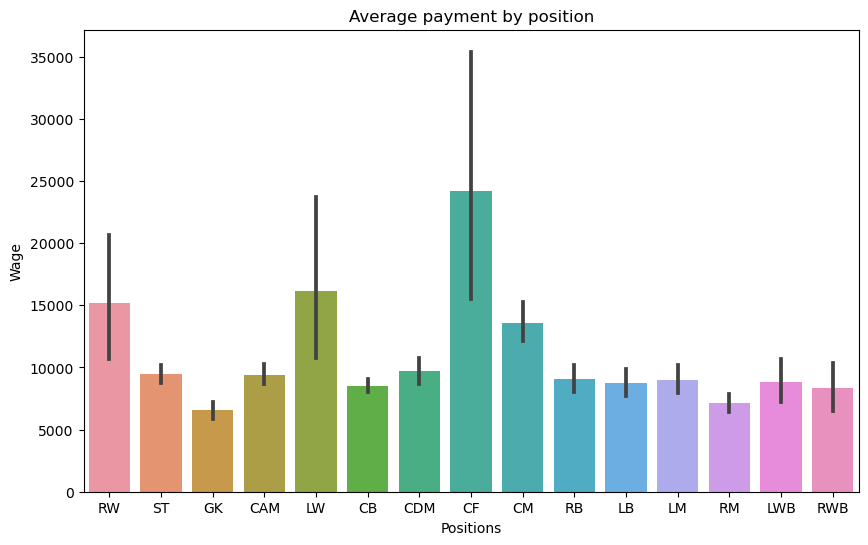

In [25]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average payment by position")

# Bar chart 
sns.barplot(x=df['Best Position'], y=df['Wage'], estimator=np.mean)

# Add label for vertical axis
plt.ylabel("Wage")

# Add label for horizontal axis
plt.xlabel("Positions")

In the above barplot, we can observe that the position with the highest average pay is CF (Center Forward). It's peculiar because one might assume that the best-paid positions would be where players like Messi or Cristiano play, considering these players have a higher monthly wage.



In [26]:
df[['Best Position', 'Wage']].groupby('Best Position').agg({'Wage': ['max', 'mean', 'median', 'min']})

Wage                             
                    max          mean  median    min
Best Position                                       
CAM            370000.0   9399.434537  3000.0    0.0
CB             300000.0   8471.011937  3000.0    0.0
CDM            310000.0   9682.975779  3000.0    0.0
CF             350000.0  24163.461538  8000.0    0.0
CM             310000.0  13582.425979  4000.0    0.0
GK             260000.0   6553.614458  2000.0    0.0
LB             220000.0   8748.941068  3000.0    0.0
LM             175000.0    8949.02411  3000.0    0.0
LW             350000.0  16120.698925  4000.0  500.0
LWB            115000.0   8805.172414  3000.0    0.0
RB             230000.0   9096.246525  3000.0    0.0
RM             150000.0    7142.83054  2000.0    0.0
RW             560000.0  15166.610738  4000.0    0.0
RWB            140000.0   8366.606498  3000.0  500.0
ST             300000.0   9431.679104  3000.0    0.0

Above, there is a table displaying statistics related to the correlation between Best Position and Wage. The metrics encompass maximum value, mean, median, and minimum value. Given the significant disparity between the mean and the median values, it can be inferred that there are numerous outliers (values much higher or lower than the median).
Let's plot a boxplot to provide evidence of that

<Axes: title={'center': "Box plot Wage for the position 'RW'"}, xlabel='Wage'>

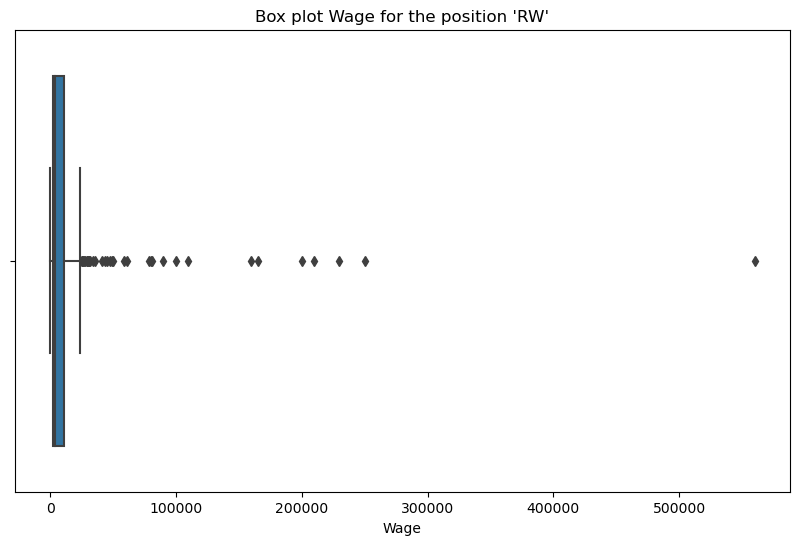

In [27]:
mask = df['Best Position'] == 'RW'

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Box plot Wage for the position 'RW'")

# Box chart 
sns.boxplot(x=df[mask]['Wage'])

As we can observe in the boxplot above, we have a lot of outliers in the Wage of the players with RW (Right Winger) position. 

In [28]:
df[mask][['LongName', 'Wage']].sort_values(by = 'Wage', ascending = False).head()

,LongName,Wage
0,Lionel Messi,560000.0
6,Mohamed Salah,250000.0
31,Bernardo Mota Carvalho e Silva,230000.0
75,Riyad Mahrez,210000.0
205,Gareth Bale,200000.0


The previous table shows us that the better players have a wage higher than the median. For instance, **Messi has a wage of 560,000, which is 140 times higher than the median wage of 4,000.**

### Which players are highly valuable but still underpaid (on low wages)?
What is the correlation between Wage and Value?

In [69]:
df[['Wage','Value']].corr()

,Wage,Value
Wage,1.00000,0.81487
Value,0.81487,1.00000


The association between Wage and Value is high. Let's use scatter plot to take a look of it.

Text(0.5, 0, 'Wage vs Value')

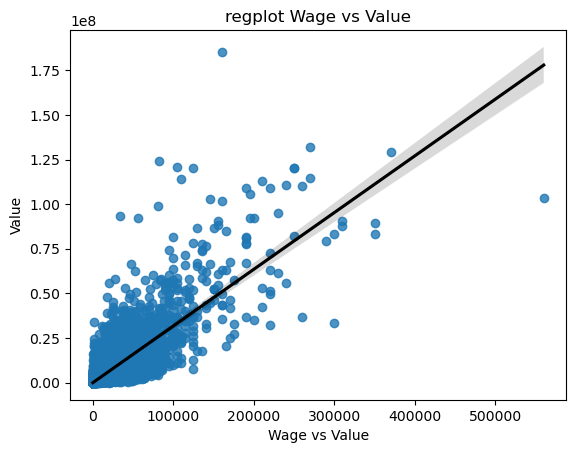

In [77]:
sns.regplot(x=df['Wage'].astype('float'), y=df['Value'].astype('float'), order = 1, line_kws=dict(color="k"))
# Add title
plt.title('regplot Wage vs Value')
# Add label for horizontal axis
plt.xlabel("Wage vs Value")

### Which countries should club managers look to for potential talent to develop?

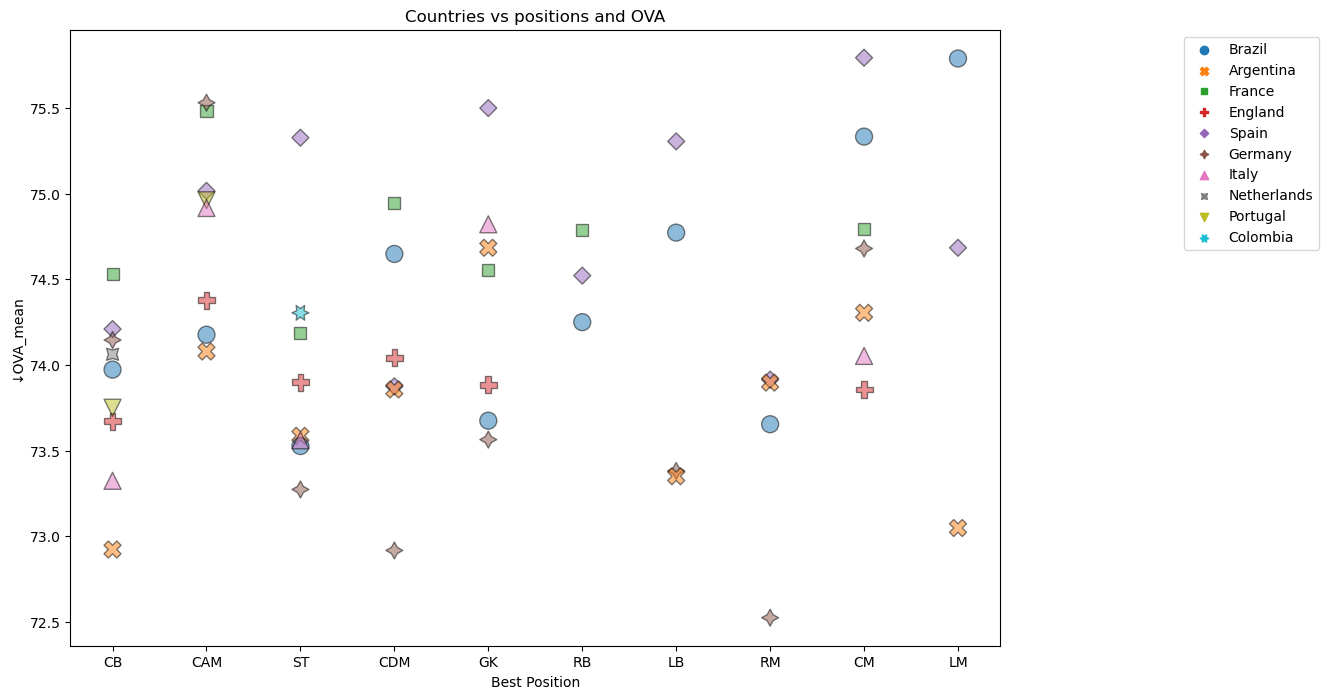

In [78]:
data_25 = df[(df['↓OVA']>=70) & (df['↓OVA'] <=84)]
data_25 = data_25.groupby(['Nationality','Best Position']).agg({'↓OVA':'mean', 'Age':['mean','count']})
data_25.columns = ['_'.join(col) for col in data_25.columns.values]
data_25 = data_25.reset_index().sort_values(('Age_count'), ascending = False)
data_25 = data_25.query('Age_count >18')
data_25 = data_25.rename(columns={'Age_count':'players_count'})
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Best Position', y='↓OVA_mean', 
                    s=150,
                    data=data_25, 
                    hue = 'Nationality', 
                    alpha = 0.5,
                    edgecolor = 'black',
                    style = 'Nationality'
               )
plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1))
plt.title("Countries vs positions and OVA")
plt.show()

A summary of countries recommended for scouting talented players across different positions:

Spain stands out for nurturing talented players in the ST, CDM, LB, CM, and RM positions.

France holds the record for the highest average OVA among its players in the CB, CAM, CDM, and RB positions compared to the other 11 countries.

Argentina is also a favorable choice for scouting players in the RM position.

Germany possesses the highest number of players with the best average OVA in the CAM positions.

Brazil is a noteworthy consideration for scouting players in the LM and RM positions.